In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
class Neuron:
    
    def __init__(self, E_m, l, d, r_m, r_a, c_m):
        self.E_m = E_m
        self.l   = l
        self.d   = d
        self.r_m = r_m
        self.r_a = r_a
        self.c_m = c_m
        
        rad = self.d/2
        
    def simulate(self, I_t, dt, time, plot=True):
        '''Simulate passive membrane voltage response to an input current'''
        
        V_t = self.E_m
        rad = self.d/2
        R_m = self.r_m/(2*np.pi*rad*self.l)
        C_m = self.c_m*(2*np.pi*rad*self.l)
        tau = R_m*C_m
        
        V_course = []
        for i in np.arange(0, time, dt):
            V_t1 = V_t + dt*((self.E_m - V_t)/tau + I_t/C_m)
            V_course.append(V_t1)
            V_t = V_t1
        
        if plot:
            figure = plt.figure(figsize=(20, 8))
            plt.ylim(-abs(min(V_course)*1.5), abs(min(V_course)*1.5))
            plt.axhline(y=0, color='k', linestyle='--', alpha=0.4)
            plt.grid(alpha=0.4)
            plt.title('Injected current', fontsize=20)
            plt.xlabel('Time / ms', fontsize=15)
            plt.ylabel('Membrane voltage response / V', fontsize=15)
            xi = np.arange(0, len(V_course))/(1/(dt*1000))
            plt.plot(xi, V_course)
        return V_course
    
    def simulate_sin(self, A, f, dt, time, plot=True):
        '''Simulate passive membrane voltage response to a sinusoid input current'''
        
        V_t  = self.E_m
        rad  = self.d/2
        R_m = self.r_m/(2*np.pi*rad*self.l)
        C_m = self.c_m*(2*np.pi*rad*self.l)
        tau  = R_m*C_m
        step = 0
        
        V_course = []
        for i in np.arange(0, time, dt):
            I_t   = A*np.sin(2*np.pi*f*step)
            V_t1 = V_t + (dt*(self.E_m - V_t + R_m*I_t))/tau
            V_course.append(V_t1)
            V_t = V_t1
            step += dt
        
        if plot:
            figure = plt.figure(figsize=(20, 8))
            plt.axhline(y=0, color='k', linestyle='--', alpha=0.4)
            plt.grid(alpha=0.4)
            plt.title('Injected sine current at %.1f Hertz' %f, fontsize=20)
            plt.xlabel('Time / ms', fontsize=15)
            plt.ylabel('Membrane voltage response / V', fontsize=15)
            xi = np.arange(0, len(V_course))/(1/(dt*1000))
            plt.plot(xi, V_course)
        return V_course
    
    def simulate_two_compartment(self, I_t, R_m, R_a, C_m, dt, t_e, t_s, time, plot=True):
        '''Simulate passive two-compartment model membrane voltage response to an input current'''
        
        V1_t = self.E_m
        V2_t = self.E_m
        tau = R_m * C_m
        V1_course = []
        V2_course = []
        for j in np.arange(0, time, dt):
            if j < (t_e):
                curr_I = I_t[0]
            elif (t_e) <= j < (t_s):
                curr_I = I_t[1]
            else:
                curr_I = I_t[2]
            V1_t1 = V1_t + dt*((self.E_m - V1_t)/tau + (V2_t - V1_t)/(R_a*C_m) + curr_I/C_m)
            V1_course.append(V1_t1)
            V1_t = V1_t1

            V2_t1 = V2_t + dt*((V1_t - V2_t)/(R_a*C_m) + (self.E_m - V2_t)/tau)
            V2_course.append(V2_t1)
            V2_t = V2_t1
        
        if plot:
            figure = plt.figure(figsize=(13, 7))
            plt.ylim(-abs(min(V1_course)*1.5), abs(min(V1_course)*1.5))
            plt.axhline(y=0, color='k', linestyle='--', alpha=0.4)
            plt.grid(alpha=0.4)
            plt.title('Injected current', fontsize=20)
            plt.xlabel('Time / ms', fontsize=15)
            plt.ylabel('Membrane voltage response / V', fontsize=15)

            xi = np.arange(0, len(V1_course))/(1/(dt*1000))
            plt.plot(xi, V1_course, label="Compartment 1")
            plt.plot(xi, V2_course, label='Compartment 2')
            plt.axvline(x=t_e*1000, color='r', linestyle='--', alpha=0.4)
            plt.axvline(x=t_s*1000, color='r', linestyle='--', alpha=0.4)

            plt.xticks(fontsize = 10)
            plt.yticks(fontsize = 10)
            plt.xlim(200, 700)
            plt.legend(prop={'size': 12})
        return V1_course, V2_course

    def simulate_two_compartment_sin(self, A, f, dt, R_m, R_a, C_m, time, plot=True):
        '''Simulate passive two-compartment model membrane voltage response to a sinusoid input current'''
        
        V1_t = self.E_m
        V2_t = self.E_m
        tau = R_m * C_m
        V1_course = []
        V2_course = []
        for j in np.arange(0, time, dt):
            curr_I = A*np.sin(2*np.pi*f*j)
            V1_t1 = (V1_t + dt*((self.E_m - V1_t)/tau + (V2_t - V1_t)/(R_a*C_m) + curr_I/C_m))
            V1_course.append(V1_t1)
            V1_t = V1_t1
            V2_t1 = (V2_t + dt*((V1_t - V2_t)/(R_a*C_m) + (self.E_m - V2_t)/tau))
            V2_course.append(V2_t1)
            V2_t = V2_t1
        
        if plot:
            figure = plt.figure(figsize=(13, 7))
            plt.axhline(y=0, color='k', linestyle='--', alpha=0.4)
            plt.grid(alpha=0.4)
            plt.title('Injected current', fontsize=20)
            plt.xlabel('Time / ms', fontsize=15)
            plt.ylabel('Membrane voltage response / V', fontsize=15)

            xi = np.arange(0, len(V1_course))/(1/(dt*1000))
            plt.plot(xi, V1_course, label="Compartment 1")
            plt.plot(xi, V2_course, label='Compartment 2')
            plt.xticks(fontsize = 10)
            plt.yticks(fontsize = 10)
            plt.legend(prop={'size': 12})
        return V1_course, V2_course
    
    def simulate_multi_compartment(self, N, j, I_t, R_m, R_a, C_m, dt, t_e, t_s, time, plot=True):
        '''Simulate passive multi-compartment model membrane voltage response to an input current
           First compartment with 'sealed end'
           Last compartment with 'killed end'
        '''
        
        V_t = np.zeros(N)
        tau = R_m * C_m
        V_course = np.zeros((N, int(time/dt)))
        
        right = [i for i in range(1, j)][::-1]
        left = [i for i in range((j+1), (N-1))]
        k = 0
        for t in np.arange(0, time, dt):
            if t < t_e:
                curr_I = I_t[0]
            elif t > t_s:
                curr_I = I_t[2]
            else:
                curr_I = I_t[1]
            V_course[j, k] = V_t[j] + dt*((self.E_m - V_t[j])/tau + (V_t[j+1] - V_t[j])/(R_a*C_m) + (V_t[j-1] - V_t[j])/(R_a*C_m) + curr_I/C_m)
            V_t[j] = V_course[j, k]
            for r in right:
                V_course[r, k] = V_t[r] + dt*((self.E_m - V_t[r])/tau + (V_t[r+1] - 2*V_t[r] + V_t[r-1])/(R_a*C_m))
                V_t[r] = V_course[r, k]
            for l in left:
                V_course[l, k] = V_t[l] + dt*((self.E_m - V_t[l])/tau + (V_t[l-1] - 2*V_t[l] + V_t[l+1])/(R_a*C_m))
                V_t[l] = V_course[l, k]
            c = 0
            V_course[c, k] = V_t[c] + dt*((self.E_m - V_t[c])/tau + (V_t[c+1] - V_t[c])/(R_a*C_m))
            V_t[c] = V_course[c, k]
            c = (N-1)
            V_course[c, k] = 0
            V_t[c] = V_course[c, k]
            k += 1
            
        if plot:
            figure = plt.figure(figsize=(13, 7))
            plt.grid(alpha=0.4)
            plt.title('Injected current', fontsize=20)
            plt.xlabel('Time / ms', fontsize=15)
            plt.ylabel('Membrane voltage response / V', fontsize=15)
            plt.axvline(x=t_e*1000, color='r', linestyle='--', alpha=0.4)
            plt.axvline(x=t_s*1000, color='r', linestyle='--', alpha=0.4)

            xi = np.arange(0, V_course.shape[1])/(1/(dt*1000))
            for c in range(N):
                plt.plot(xi, V_course[c, :], label="Compartment %d"%(c))
            plt.xticks(fontsize = 10)
            plt.yticks(fontsize = 10)
            plt.xlim(0, 800)
            plt.legend(prop={'size': 7}, ncol=2)
        return V_course

In [3]:
E_m = 0
L   = 100*10**-6
d   = 2*10**-6
r_m = 1
r_a = 1
c_m = 10**-2

a = Neuron(E_m, L, d, r_m=r_m, r_a=r_a, c_m=c_m)

In [ ]:
I_t    = -50*10**-12
dt     = 0.0001
time   = 1
v      = a.simulate(I_t, dt, time)

In [ ]:
f      = 100
A      = 100*10**-12
dt     = 0.00001
time   = 3
v = a.simulate_sin(A, f, dt, time, plot=True)

In [ ]:
def get_amplitude(neuron, f):
    amp = []
    for i in range(len(f)):
        curr_f = f[i]
        V = a.simulate_sin(A, curr_f, dt, time, plot=False)
        l = len(V)
        tmp = V[(l//2):]
        amp.append(max(tmp))
    return amp

In [ ]:
f = [0.5, 1, 2, 8, 100, 1000]
amp = get_amplitude(a, f)

In [ ]:
figure = plt.figure(figsize=(8, 8))
plt.grid(alpha=0.4)
plt.xlabel('Log-frequency of injected current / [Hz]', fontsize=15)
plt.ylabel('Log-voltage membrane response / [V]', fontsize=15)
plt.title('Bode diagram', fontsize=20)
plt.plot(np.log(f), np.log(amp))
plt.scatter(np.log(f), np.log(amp))

In [ ]:
R_m   = 265*10**6
R_a   = 265*10**6
C_m   = 75*10**-12
I_t   = [0, -100*10**-12, 0]
t_e   = 0.4
t_s   = 0.44
dt    = 0.00001
time  = 1 #s

v1, v2 = a.simulate_two_compartment(I_t, R_m, R_a, C_m, dt, t_e, t_s, time)

In [ ]:
R_m  = 265*10**6
R_a  = 300*10**6
C_m  = 75*10**-12
A    = 100*10**-12
f    = 50
dt   = 0.0001
time = 2 #s

v1, v2 = a.simulate_two_compartment_sin(A, f, dt, R_m, R_a, C_m, time)

In [ ]:
def get_amplitude(neuron, f):
    amp1 = []
    amp2 = []
    for i in range(len(f)):
        curr_f = f[i]
        v1, v2 = a.simulate_two_compartment_sin(A, curr_f, 0.000001, r_m, r_a, c_m, time, plot=False)
        l = len(v1)
        tmp1 = v1[(l//2):]
        tmp2 = v2[(l//2):]
        amp1.append(max(tmp1))
        amp2.append(max(tmp2))
    return amp1, amp2

In [ ]:
f = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000]
amp1, amp2 = get_amplitude(a, f)

In [ ]:
figure = plt.figure(figsize=(8, 8))
plt.grid(alpha=0.4)
plt.xlabel('Log-frequency of injected current [Hz]', fontsize=15)
plt.ylabel('Log-voltage membrane response [V]', fontsize=15)
plt.title('Bode diagram', fontsize=20)
plt.plot(np.log(f), np.log(amp1))
plt.scatter(np.log(f), np.log(amp1), label='Compartment 1')
plt.plot(np.log(f), np.log(amp2))
plt.scatter(np.log(f), np.log(amp2), label='Compartment 2')
plt.legend(prop={'size': 12})

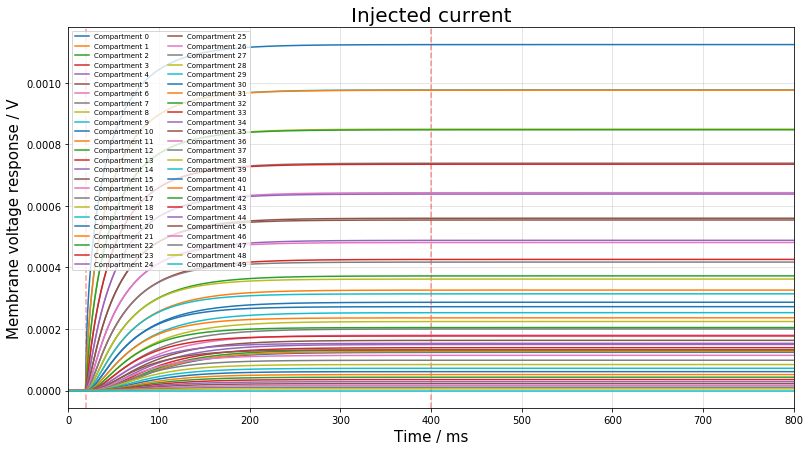

In [4]:
N = 50
j = 20
I_t = [0, 10*10**-12, 10*10**-12]
R_m = 1.59*10**9
R_a = 0.0318*10**9
C_m = 62.8*10**-12
dt = 0.001
t_e = 0.02
t_s = 0.4
time = 1

v = a.simulate_multi_compartment(N, j, I_t, R_m, R_a, C_m, dt, t_e, t_s, time, plot=True)

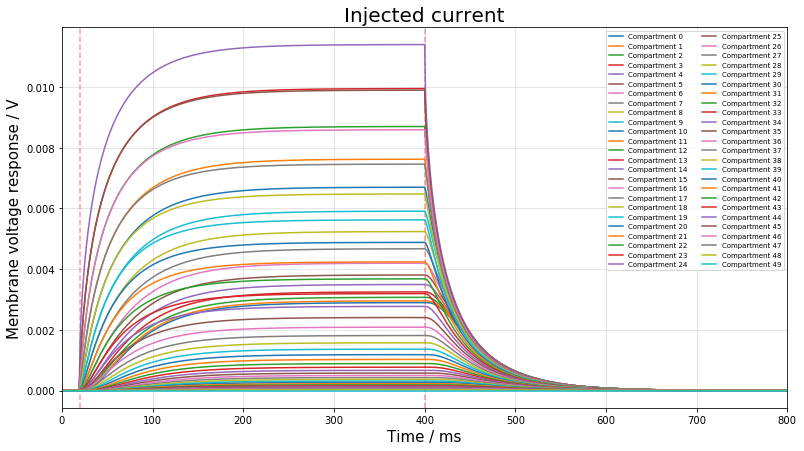

In [9]:
N = 50
j = 14
I_t = [0, 100*10**-12, 0]
R_m = 1.59*10**9
R_a = 0.0318*10**9
C_m = 62.8*10**-12
dt = 0.001
t_e = 0.02
t_s = 0.4
time = 1

v = a.simulate_multi_compartment(N, j, I_t, R_m, R_a, C_m, dt, t_e, t_s, time, plot=True)

In [ ]:
from mpl_toolkits.mplot3d import axes3d
nx, ny = 1000, 50
x = range(nx)
y = range(ny)

hf = plt.figure(figsize=(12, 8))
ha = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)
ha.plot_surface(X, Y, v)


In [10]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Surface(z=v))
fig.update_layout(scene = dict(
                    xaxis_title='Time / ms',
                    yaxis_title='Compartment',
                    zaxis_title='Voltage / V'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()
# fig.write_image("fig1.png")